# 随机抽样


作者：[王何宇](http://person.zju.edu.cn/wangheyu)

[浙江大学数学科学学院](http://www.math.zju.edu.cn)

上一章我们讨论了最简单的随机分布，均匀分布随机数的产生方法。有了这个均
匀分布随机数的基础，这一章我们将进一步讨论如何产生各种所需的随机变量和
随机过程。首先我们回顾一下概率论的一些基本定义。

## 基础知识回顾
我们用概率分布来描述一个随机变量服从的分布规律，具体来说，离散型随机变
量的概率分布称为

**概率质量函数（Probability Mass Function, PMF)**
若离散型随机变量 $\xi$ 取值为 $x_1, x_2, \cdots, x_n$ 的概率分别为 $p_1, p_2, \cdots, p_n$, 即
$$
\begin{equation}
    P(\xi = x_i) = p_i, i = 1, 2, \cdots, n,
    \label{eq::dis_df}
\end{equation}
$$
则其概率分布函数
$$  
\begin{equation}
f(x) = \left\{
    \begin{array}{ll}
      p_i, & x \in S,\\
      0, & x \in \mathbb{R}\setminus S
    \end{array}\right.
    \label{eq::dis_pmf}
  \end{equation}
$$
又称为概率质量函数，简称为 PMF。其中 $S = \{x_1, x_2, \cdots, x_n\}$ 称为样本集。显然，在离散的情形下，有
$$
\sum_{x_i \in S}p_i = \sum_{i = 1}^np_i = 1.
$$

**累积分布函数（Cumulative Distribution Function, CDF）**
称
$$
  \begin{equation}
    F(x) = P(\xi \leq x) = \sum_{x_i \leq x}p_i, x \in \mathbb{R}
    \label{eq::dis_cdf}
  \end{equation}
$$  
为累积分布函数，简称为CDF。

**两点分布** 两点分布的 PMF 为
$$
  \begin{equation}
    f(x) = \left\{\begin{array}{ll}
    0.5, &x = 0; \\
    0.5, &x = 1;\\
    0, &x \notin \{0, 1\}.
    \end{array}\right.
    \label{eq::2p_PMF}
  \end{equation}
$$  
对应的CDF为
$$  
\begin{equation}
    F(x) = \left\{\begin{array}{ll}
    0, & x < 0; \\
    0.5, &0 \leq x < 1; \\
    1, &x = 1.
    \end{array}\right.
    \label{eq::2p_CDF}
  \end{equation}
$$  

更常见的，离散型随机变量的特征会像下面那样表示。

**二项分布** 的PMF一般写做
$$
\begin{equation}
  b(k; n, p) = \binom{n}{k}p^k(1 - p)^{n - k}, 0 < p < 1, k = 0, 1, \cdots, n.
  \label{eq::binom_PMF}
\end{equation}
$$

随机模拟的一个重要步骤是根据需要产生服从各种分布的样本集。之前我们已经讨论过如何产生服从 $U(0, 1)$ 的均匀分布的随机数，那么现在，我们就要从服从 $U(0, 1)$ 的均匀分布的随机序列出发，产生独立同分布的目标随机数序列。这里两个问题的解决是各自独立的。首先随机序列的独立性完全由均匀分布的随机序列的独立性决定，这在上一章已经讨论。我们接下去主要讨论如何确保随机序列同分布，也即和要求的目标分布一致。这里还有一个重要问题是产生效率，因为我们必须在计算机上算法实现。

## 直接抽样方法

如果随机变量的 PMF 是已知的，那么我们可以从均匀分布的随机数出发，直接根据概率论定义构建抽样算法。这种方法称为直接抽样方法。即产生均匀分布的随机序列，然后通过某种变换或抽取，使得从中变换抽取后的随机数样本集 $X$ 服从 $F(x)$，这里 $F(x)$ 是已知积累分布函数。也即要求 $\forall \xi \sim F$，
$$
\begin{equation}
  P(\xi \leq x) = F(x), x \in \mathbb{R}.
  \label{eq::def_cdf}
\end{equation}
$$
这里，一方面，我们要从算法保证（证明）$X$ 确实服从指定分布 $F(x)$；另一方面，对于一个实际的产生的抽样结果，也要能通过指定的统计检验。

### 逆变换算法

1947 年，曼哈顿计划的参与者 Stanislaw Marein Ulam 提出了逆变换算法，注意到随机变量 $\xi$ 的累积分布函数 $F(x): \mathbb{R} \mapsto [0, 1]$ 是非降的，故定义其逆函数为
$$
\begin{equation}
  F^{-1}: [0, 1] \mapsto \mathbb{R}, F^{-1}(y) = \inf \{x \left| F(x).
  \geq y \right.\}
  \label{eq::inv_cdf}
\end{equation}
$$

**证明：** $\forall x \in \mathbb{R}$，
$$
  \begin{equation}
    P(\xi \leq x) = P(F^{-1}(\eta) \leq x) = P(\eta \leq F(x)) = F(x).
    \label{eq::prof_inv_cdf}
  \end{equation}
$$

所以我们算法的设计思路就是对一个均匀分布的随机数序列 $U$，求其逆变换 $X = F^{-1}(U)$，则 $X$ 的分布服从 $F(x)$。


### 列表查找法

这种做法一般针对离散分布，特别是能给出分布表的离散分布。若离散分布的 PMF 表为
$$
\begin{array}{cccc}
  x_0 & x_1 & \cdots & x_n \\
  p_0 & p_1 & \cdots & p_n,
\end{array}
$$
且 $x_0 < x_1 < \cdots < x_n$, 则我们不难构建CDF表
$$
\begin{array}{cccccc}
  x_0 & x_1 & \cdots & x_k & \cdots & x_n \\
  F_0 = p_0 & F_1 = p_0 +  p_1 & \cdots
  & F_k = \sum_{i = 0}^k p_i & \cdots & F_n \equiv 1.
\end{array}
$$
根据 PMF 定义，$\forall x \notin \{x_0, x_1, \cdots, x_n\}$，有$f(x) = 0$，故我们可以认为 $F_{-1} = 0$。
现在对$\eta \sim U(0, 1)$, 必有$0 \leq k \leq n$（为什么？）, 满足
$$
\begin{equation}
  \label{eq::def_dis_pmf}
F_{k - 1} < \eta \leq F_k,
\end{equation}
$$
则可取 $\xi = x_k$。从PMF角度，就是
$$
\begin{equation}
  \xi = \min\left\{x_k\left|\eta \leq \sum_{i = 0}^kf(x_i)\right.\right\}, \eta \sim U(0, 1).
  \label{eq::dis_inv}
\end{equation}
$$
在具体的抽取算法中，这一过程就是查表。对于较长的表，可以采用二分查找。

In [1]:
from __future__ import print_function, division

# 这句话是非标准的python，用于ipthon或jupyter这样的系统中，表示绘图即刻自动展开。
%matplotlib inline

# 这里把全部Warning过滤掉了. 
# 参见https://docs.python.org/2/library/warnings.html
import warnings
warnings.filterwarnings('ignore')
from scipy.special import comb, perm
from scipy import stats
import numpy as np
import sys
import matplotlib.pyplot as plt
np.random.seed(250)

## 离散分布举例
下面产生一个服从$n，p$的二项分布。

In [2]:
n = 10
p = 0.3
k = np.arange(0, n + 1, 1)
# 生成器，在具体调用时产生序列。
PMF = [stats.binom.pmf(i, n, p) for i in k] 

In [3]:
print(PMF) # 表格中数据

[np.float64(0.0282475249), np.float64(0.12106082099999989), np.float64(0.2334744405000001), np.float64(0.26682793199999977), np.float64(0.2001209489999999), np.float64(0.10291934519999989), np.float64(0.036756908999999956), np.float64(0.009001691999999992), np.float64(0.0014467004999999982), np.float64(0.00013778099999999988), np.float64(5.9048999999999975e-06)]


接下去绘制PMF和CDF的插图。这里也可以学习一下Python如何绘图。

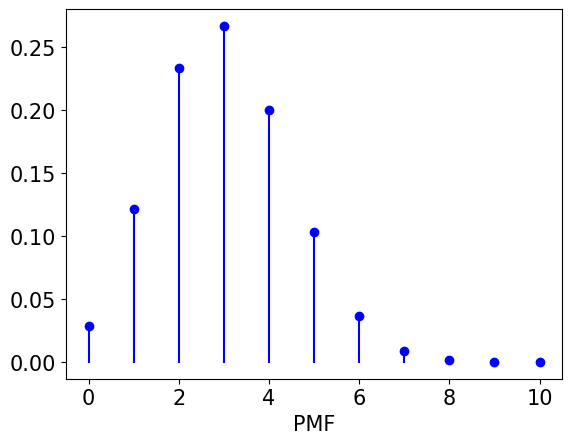

In [4]:
for i in k:
    plt.plot([k[i], k[i]],[0,PMF[i]],'b-') # 画n + 1条直线。
    plt.plot(k[i], PMF[i],'bo') # 顶部画个点。
plt.xticks(fontsize=15) # 调整一下标记字体。
plt.yticks(fontsize=15)
plt.xlabel(r'PMF',fontsize=15) # 加标题。
# plt.savefig('PMF_bin.pdf')
plt.show()

将PMF累加即得离散分布的CDF，也即
$$
F(x_k) = \sum_{-\infty}^k f(x_i).
$$

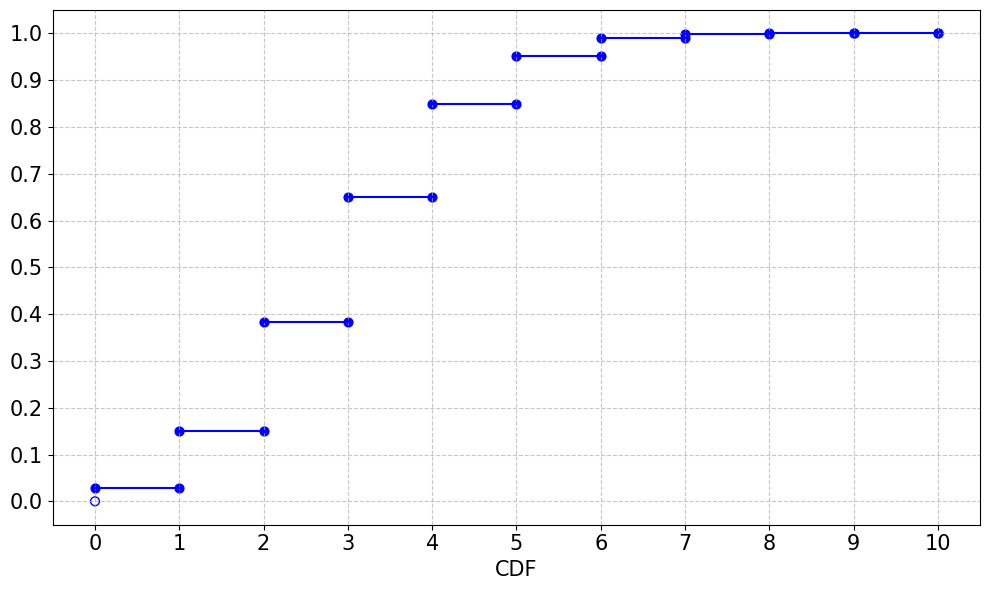

In [5]:
# 假设 n, k, PMF 已经定义好
fig, ax = plt.subplots(figsize=(10, 6))

c = 0
CDF = [0] * (n + 1)

assert len(k) >= n + 1, "k的长度必须至少是n+1"

# 用来收集要画的线段和点
lines = []
points_x = []
points_y = []
hollow_points_x = []
hollow_points_y = []

for i in range(n):
    c += PMF[i]
    CDF[i] = c
    # 收集线段 (每一段是水平的)
    lines.append(([k[i], k[i+1]], [c, c]))
    # 收集点
    points_x.append(k[i])
    points_y.append(c)
    points_x.append(k[i+1])
    points_y.append(c)

# 最后一个点
CDF[n] = 1

# 额外收集起点(0,0)空心圆
hollow_points_x.append(0)
hollow_points_y.append(0)
# 收集终点(n,1)实心圆
points_x.append(n)
points_y.append(1)

# 画所有线段
for (x_pair, y_pair) in lines:
    ax.plot(x_pair, y_pair, 'b-')

# 画所有普通实心点
ax.scatter(points_x, points_y, color='b', marker='o', s=40)

# 画空心点（起点）
ax.scatter(hollow_points_x, hollow_points_y, facecolors='none', edgecolors='b', marker='o', s=40)

# 设置坐标轴
ax.set_xticks(k)
ax.set_xlabel('CDF', fontsize=15)
ax.set_yticks([i/10 for i in range(11)])  # 0, 0.1, ..., 1
ax.tick_params(axis='both', labelsize=15)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

构建一个用于二分法查表的函数。稍微有一些针对性处理。关于二分查找和递归过程的内容可参考MIT的网络公开课《算法导论》，03年版。

In [6]:
CDF[9]

np.float64(0.9999940950999994)

In [7]:
def bisection_search(F, eta, start, end):
    if (eta <= F[start]):
        return start
    n = end - start
    if (n <= 0):
        sys.exit()
    k = (start + end) // 2
    if (eta > F[k]):
        if (eta <= F[k + 1]):
            return k + 1
        else:
            return bisection_search(F, eta, k + 1, end)
    else:
        return bisection_search(F, eta, start, k)

做1000000次随机抽取，形成二项分布的随机序列X。

In [8]:
U = np.random.rand(100000)
X = [bisection_search(CDF, U[i], 0, n) for i in range(100000)]
max(X)

9

用统计来验证我们生成的随机序列确实服从目标分布。

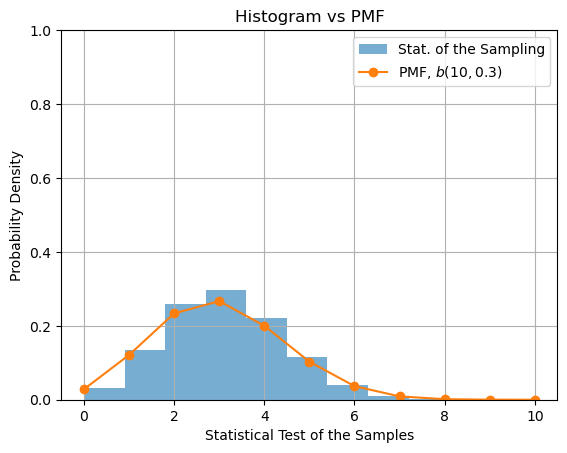

In [9]:
import matplotlib.pyplot as plt

plt.hist(X, density=True, label="Stat. of the Sampling", alpha=0.6)
plt.plot(range(len(PMF)), PMF, 'o-', label=r"PMF, $b(10, 0.3)$")

plt.legend()
plt.xlabel("Statistical Test of the Samples")
plt.ylabel("Probability Density")
plt.title("Histogram vs PMF")
plt.grid(True)
plt.ylim(0, 1)  # 👈 直接把y轴压缩到0~1

#plt.savefig('test_bin.pdf')
plt.show()

实测结果和理论符合的很好。

## 连续分布的情形
而对于连续型随机变量，可以看作是离散型随机变量的一种极限情形。此时概率分布无法逐点定义，而是定义在样本集内的正测度集上，即考察随机变量落在一个正测度集内的概率是多少。而从这个角度我们发现，之前在定义所引入的累积分布函数
$$
F(x) = P(\xi \leq x), x \in \mathbb{R}
$$
对连续型随机变量仍然适用，而在此基础上，可进一步引入直观上“概率如何在一点上的定义”。由于一点是零测度集，所以这种定义无法脱离正测度集的概
念独立存在，而被看作“微元正测度集”的概率。

**概率密度函数（Probability Density Function, PDF）** 对连续型随机变量，$\forall x \in \mathbb{R}$, 我们仍称
$$
  \begin{equation}
    F(x) = P(\xi \leq x), x \in \mathbb{R}
    \label{eq::df}
  \end{equation}
$$  
为累计分布函数，若存在某个非负的可积函数 $f(x)$，满足
$$
  \begin{equation}
    F(x) = \int_{-\infty}^x f(y) dy, \forall x \in \mathbb{R},
    \label{eq::pdf}
  \end{equation}
$$  
则称 $f(x)$ 为对应随机分布的概率密度函数，简称为PDF。此时，
$$
  \begin{equation}
    f(x) = F'(x).
    \label{eq::pdf2cdf}
  \end{equation}
$$

注意到我们之前定义的针对离散型随机变量的 PMF，事实上和这里定义的 PDF 并无冲突，甚至可以看作是 PDF 的一个特例（这里要看你如何定义积分了）。关于逆变换的定义也可以完全沿用。

对于连续分布的采样抽取，如果存在容易计算的逆变换解析表达式 $F^{-1}(y)$，那么对于 $U(0, 1)$ 的均匀分布的随机变量 $\eta$，直接计算 $F^{-1}(\eta)$ 即可。也就是说，
$$
\begin{equation}
  \xi = \min\left\{x \left|\eta \leq \int_{-\infty}^x f(t)
  dt\right.\right\} = F^{-1}(\eta), \eta \sim U(0, 1),
  \label{eq::inv}
\end{equation}
$$
则 $\xi \sim f(x)$。下面算法给出了Rayleigh分布逆变换抽样的实现。

## 连续分布举例
下面是连续情形的逆变换直接抽样。如果能写出逆变换的解析形式，而且便于计算，那么整个过程非常直接方便。这是一个Rayleigh分布直接抽样的例子。

In [10]:
def sample_Rayleigh(U, sigma):
    return [np.sqrt(-2 * sigma**2 * np.log(u)) for u in U]

还是直接抽样1000000次。

In [11]:
U = np.random.rand(1000000)
X = sample_Rayleigh(U, 0.5)

同样的，我们需要统计验证。

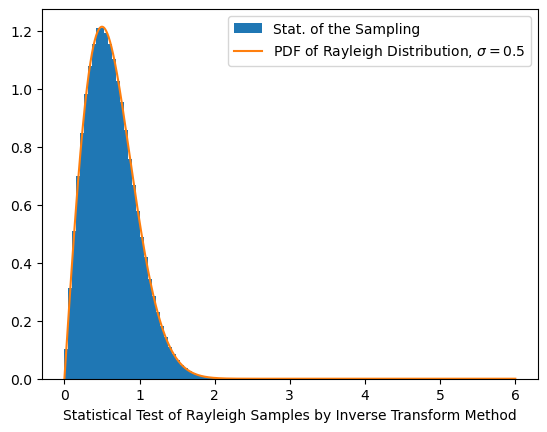

In [12]:
s = 0.5
x = np.linspace(0,6,10000)
f = (x/s**2) * np.exp(-x**2/(2 * s**2))
plt.hist(X, bins=50,density=True, label="Stat. of the Sampling");
plt.plot(x, f, label=r"PDF of Rayleigh Distribution, $\sigma = 0.5$")
plt.legend()
plt.xlabel(r"Statistical Test of Rayleigh Samples by Inverse Transform Method")
#plt.savefig('Ray_inv.pdf')
plt.show()

这里hist的参数bins=50代表了做统计的区间分段数，由于我们的样本数足够，这个数字越大，统计图会越连续。下面是指数分布：

In [13]:
def sample_Exponential(U, beta):
    return [-beta * np.log(u) for u in U]

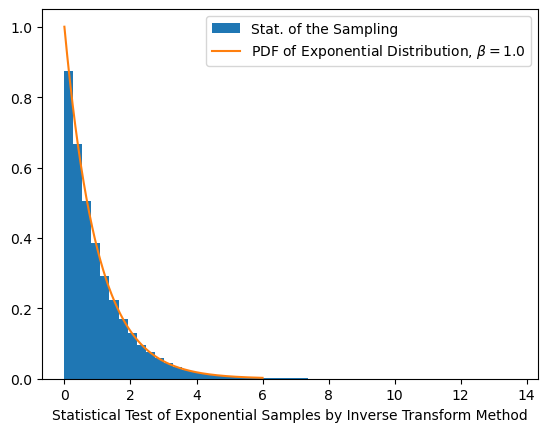

In [14]:
U = np.random.rand(1000000)
beta = 1.0
X = sample_Exponential(U, beta)
x = np.linspace(0,6,10000)
f = 1/beta * np.exp(-x/beta)
plt.hist(X, bins=50,density=True, label="Stat. of the Sampling");
plt.plot(x, f, label=r"PDF of Exponential Distribution, $\beta = 1.0$")
plt.legend()
plt.xlabel(r"Statistical Test of Exponential Samples by Inverse Transform Method")
#plt.savefig('Exp_inv.pdf')
plt.show()

这种方法是最直接的采样手段。Fishman1995 中给出了一些常见分布的 PDF 以及相应的逆变换表达式。从表上我们就发现并不是每一个能写出表达式的逆变换在计算上都是高效率的，而有的甚至根本没有解析形式。比如最重要的正态分布我们就没有解析的逆变换形式。不过 Hastings1955（这是一本神奇的书，给出了各种难以计算公式的有理逼近估计）给出了一个有理逼近形式：
$$
\begin{equation}
  F^{-1}(y) = \mu
  + \mathrm{sign}(y - \frac{1}{2})\sigma\left(t
  - \frac{c_0 + c_1 t + c_2 t^2}{1 + d_1 t + d_2 t^2 + d_3 t^3}\right),
  \label{eq::approx_normal}
\end{equation}
$$
其中
$$
t = \sqrt{-\ln\left[\min(y, 1 - y)\right]^2},
$$
各参数值为
$$
\begin{array}{c}
  c_0 = 2.515517, c_1 = 0.802853, c_2 = 0.010328,\\
  d_1 = 1.432788, d_2 = 0.189269, d_3 = 0.001308.
\end{array}
$$
此公式绝对误差小于$0.45 \times 10^-3$。

如果逆变换本身没有解析形式或者难以计算，那么另一个方法是直接从 CDF 入手计算（注意不是 PDF），当然前提是 PDF 和 CDF 可以快速计算。这本质上就是之前离散的情况的查表的极限沿拓，到了连续情形就变成对一个 $\forall y \in [0, 1]$，寻找 $x \in \mathbb{R}$，满足
$$
\begin{equation}
  F(x) = y \Rightarrow F(x) - y = 0.
  \label{eq::inv_equation}
\end{equation}
$$
而上述方程，我们可以用数值方法，比如二分法，或 Newton 法求解。

## 接受－拒绝方法（Accept-Rejection Method）

总是有一些分布，或者写不出反函数的解析表达，或者该解析表达难以计算（或计算量很大）。比如最重要的正态分布就没有显式的积累分布函数的解析表达。而一些初等函数，如指数，对数的计算，事实上计算量是极大的。1947年，冯·诺伊曼从条件概率入手，提出了取舍算法(Accept-Rejection
Method，简称AR法)。

**Neumann 1951**

令$f(z)$，$a \leq z \leq b$是某分布的概率密度函数且具有分解形式
$$
\begin{equation}
    f(z) = c g(z) h(z),
    \label{eq::AR_frac_pdf}
  \end{equation}
$$
其中
$$
\begin{equation}
    h(z) \geq 0, \int_a^b h(z) dz = 1, c = \sup_{z}\left[\frac{f(z)}{h(z)}\right],
    \label{eq::AR_pfd_hc}
  \end{equation}
$$
并且
$$
\begin{equation}
    0 \leq g(z) \leq 1.
    \label{eq::AR_pdf_g}
  \end{equation}
$$
令 $Z$ 是 PDF 为 $h(z)$ 的随机变量，$U$ 为服从 $U(0, 1)$ 的随机变量。则满足 $U \leq g(Z)$ 的随机变量 $Z$ 服从PDF为 $f(z)$ 的概率分布。

**证明：** 随机变量 $U$ 的 PDF 为 $1$，$u \in [0, 1]$；而 $Z$ 的 PDF 为 $h(z)$，$z \in [a, b]$，故二者联合分布，即随机向量$(U, Z)$ 的 PDF 为
$$
  \begin{equation}
    f_{U, Z}(u, z) = h(z).
  \end{equation}
$$
（不严格地，可看作任取 $[0, 1] \times [a, b]$ 中的一点，事件恰好落在这一点的概率。把点想像成一个点微元。）现在考虑 $Z$ 的条件概率分布
$$
  \begin{equation}
    h_Z(z\left|U \leq g(Z)\right.) =
    \frac{\int_0^{g(z)}f_{U, Z}(u, z)du}{P(U \leq g(Z))}.
    \label{eq::AR_cond_h}
  \end{equation}
$$
（这个事件说的是，首先 $Z$ 是一个随机变量，它按 $h(Z)$ 的概率分布发生。然后 $U$ 是一个 $U(0, 1)$ 分布的随机变量。两件事情同时发生的概率，可以认为是先有 $h(Z)$ 的概率 $Z$ 落在了 $z$ 点，我们还是把它想像成一个微元事件，同时 $U$ 落在 $[0, g(z)]$ 区间上，可以是其中任何一点，所以要积分。这两件事情的全概率是上式的分子。现在我们求的条件概率是，如果 $U$ 和 $Z$ 各自都是独立的，$U$ 在投点的时候并不知道 $Z$ 在哪里，以及 $g(Z)$ 是多少，但我们还是想问这种情况下，$U \leq g(Z)$ 的这个事件，关于 $Z$ 的概率密度分布是多少？那么这个就是条件概率分布，它要除以 $U \leq g(Z)$ 的概率。）
  
再由（因为 $f(z)$ 是 PDF）
$$
  \begin{equation}
    c = \frac{1}{\int_{a}^b g(z) h(z)dz},
    \label{eq::AR_dri_c}
  \end{equation}
$$
以及
$$
\begin{equation}
    \int_0^{g(z)}f_{U, Z}(u, z)dx = \int_0^{g(z)} h(z) du = g(z) h(z),
    \label{eq::AR_cond_f}
  \end{equation}
$$
和
$$
\begin{equation}
    P(U \leq g(Z)) = \int_{a}^b h (z) g(z) dz = \frac{1}{c},
    \label{eq::AR_conf_f_bottom}
  \end{equation}
$$
（$Z$ 落在 $z \in [a, b]$ 点的概率是 $h(z)$，然后此时 $U < g(Z)$ 的概率就是 $g(z)$，故 $Z$ 落在 $z$ 点，同时 $U < g(Z)$ 的单点微元概率是 $h(z)g(z)$，对 $Z$ 取遍全部可能性积分，就得到全部可能的概率。注意和上面分子的不同。分子求的是一个边际分布，是一个关于 $Z$ 的概率密度分布，而分母是一个概率，是一个数。在条件概率公式下，构成了所求的条件概率密度分布函数。）

最终有
$$
\begin{equation}
    h_Z(z\left|U \leq g(Z)\right.) = c g(z) h(z) = f(z).
    \label{eq::dri_f}
  \end{equation}
$$

根据定理结果，如果我们已知 $g(z)$ 和 $h(z)$，则可以构建算法产生服从分布
$f(z)$ 的随机变量。基本步骤为：
1. 产生服从分布 $h(z)$ 的随机变量 $Z$；
2. 产生服从 $U(0, 1)$ 的随机变量 $U$；
3. 计算 $g(Z)$；
4. 若 $U \leq g(Z)$，返回 $Z$，否则放弃，返回第1步.

**标准半正态分布（half-normal distribution）** 的PDF为：
$$
  \begin{equation}
    f(z) = \sqrt{\frac{2}{\pi}} e^{\frac{-z^2}{2}}, 0 \leq z < \infty.
    \label{eq::def_half_normal}
  \end{equation}
$$
我们可以将其写作
$$
\begin{equation}
    f(z) = \sqrt{\frac{2e}{\pi}} e^{\frac{-(z - 1)^2}{2}}e^{-z},
    \label{eq::frac_half_normal}
  \end{equation}
$$
并令
$$
\begin{equation}
\begin{array}{rcl}
    h(z) &=& e^{-z}, \\
    g(x) &=& e^{\frac{-(z - 1)^2}{2}},
\end{array}
  \end{equation}
$$
以及
$$
\begin{equation}
    c = \sqrt{\frac{2e}{\pi}} \approx 1.3155.
    \label{eq::half_normal_c}
  \end{equation}
$$

下面是用AR方法抽取标准半正态分布的过程。

In [15]:
def sample_half_normal(N):
# N, 实际采样数
    k = 0  # 实际接受总数
    U = np.random.rand(N)  # 产生均匀分布
    X = [-np.log(u) for u in U]  # 产生服从h的随机变量X, 实际上是beta(1)
    G = [np.exp(-(x-1)**2/2) for x in X]   # 计算g(X)
    U = np.random.rand(N)  # 再次产生均匀分布
    for i in range(N):
        if U[i] <= G[i]:  # 在g发生的条件下接受
            X[k] = X[i]   # 将采样记下来
            k = k + 1
    return k, X

实际产生100万个服从标准半正态分布的随机数。然后做统计检测并和PDF对比。

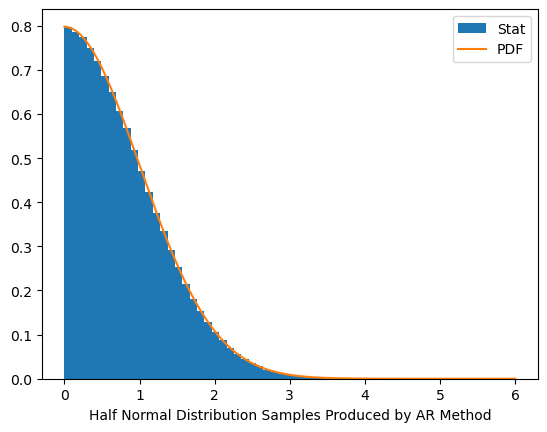

In [16]:
N = 1000000
k, X = sample_half_normal(N)
1000000/k
x = np.linspace(0,6,10000)
plt.hist(X[0:k], bins=50, density=True, label=r"Stat");
plt.plot(x,np.sqrt(2/np.pi)*np.exp(-x**2/2), label=r"PDF")
plt.legend()
plt.xlabel(r"Half Normal Distribution Samples Produced by AR Method")
#plt.savefig('half_normal.pdf')
plt.show()

结果匹配一致。然后下面将其改造为标准正态分布。

In [17]:
for i in range(k):
    w = np.random.rand()
    if w > 0.5:
        X[i] = -X[i]

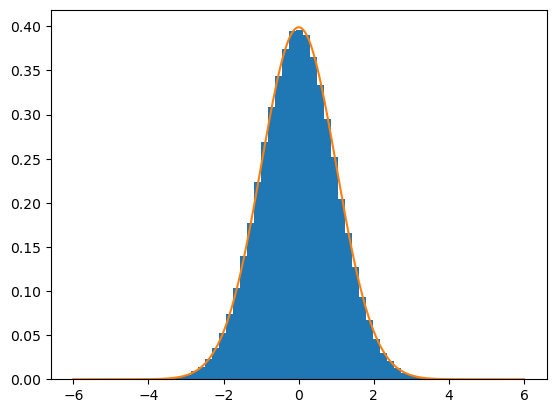

In [18]:
x = np.linspace(-6,6,10000)
plt.hist(X[0:k], bins=50,density=True, label="Stat. of the Sampling");
plt.plot(x,1/np.sqrt(2*np.pi)*np.exp(-x**2/2))
plt.show()

为防止重复抽取，应该直接在AR抽取中直接产生标准正态分布更好。

In [19]:
def sample_normal(N):
# N, 实际采样数
    k = 0  # 实际接受总数
    U = np.random.rand(N)  # 产生均匀分布
    X = [-np.log(u) for u in U]  # 产生服从h的随机变量X
    G = [np.exp(-(x-1)**2/2) for x in X]   # 计算g(X)
    U = np.random.rand(N)  # 再次产生均匀分布
    for i in range(N):
        if U[i] <= G[i]:  # 在g发生的条件下接受
            w = np.random.rand()
            if w <= 0.5:
                X[k] = X[i]
            else:
                X[k] = -X[i]
            k = k + 1
    return k, X

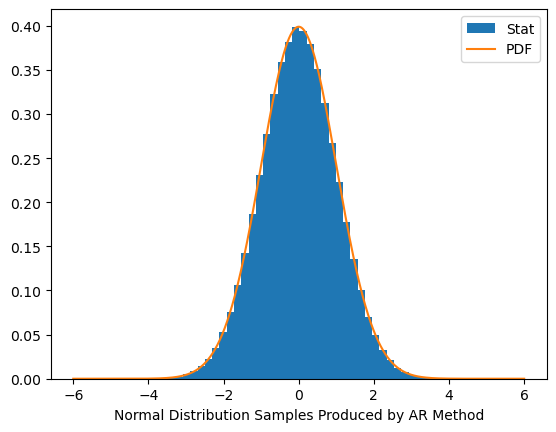

In [20]:
N = 1000000
k, X = sample_normal(N)
N/k
x = np.linspace(-6,6,10000)
plt.hist(X[0:k], bins=50,density=True, label="Stat");
plt.plot(x,1/np.sqrt(2*np.pi)*np.exp(-x**2/2), label=r"PDF")
plt.legend()
plt.xlabel(r"Normal Distribution Samples Produced by AR Method")
#plt.savefig('normal.pdf')
plt.show()

注意这个统计图本身是不对称的，因为有概率涨落。但是进一步加细可以看到，其“极限”和目标PDF匹配的很好。

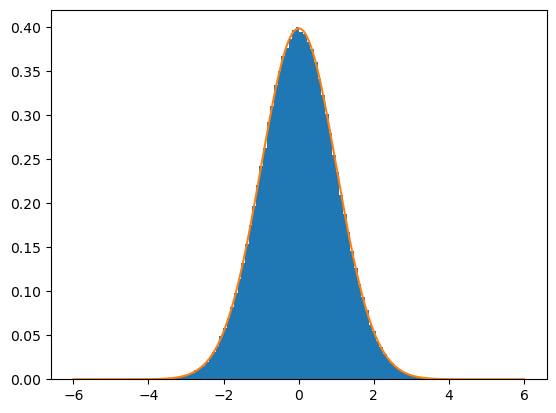

In [21]:
plt.hist(X[0:k], bins=100,density=True, label="Stat");
plt.plot(x,1/np.sqrt(2*np.pi)*np.exp(-x**2/2), label=r"PDF")
plt.show()

现在回到半正态分布的例子。我们可以画出接受和拒绝区域。而常数$c$就是接受区域的面积（总面积是１）。

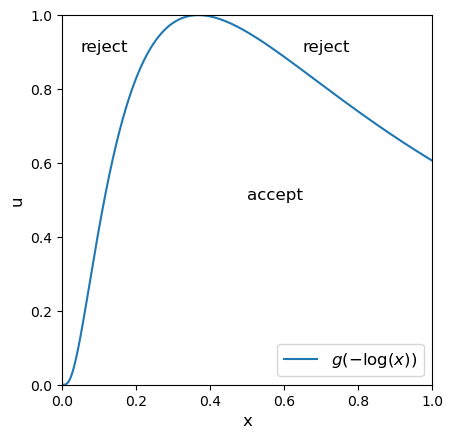

In [22]:
x = np.linspace(0,1,10000)
z = -np.log(x)
u = np.exp(-(z - 1)**2 / 2)
plt.plot(x,u,label=r'$g(-\log(x))$')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
#plt.axis("equal")
axs = plt.gca()
axs.set_aspect('equal', 'box')
plt.text(0.65, 0.9, r'reject',fontsize="12")
plt.text(0.05, 0.9, r'reject',fontsize="12")
plt.text(0.5, 0.5, r'accept',fontsize="12")
plt.legend(fontsize="12")
plt.xlabel(r"x",fontsize="12")
plt.ylabel(r"u",fontsize="12")
#plt.savefig('AR_region.pdf')
plt.show()

如果我们有办法快速产生指数分布，比如我们直接调用Python提供的指数分布生成函数，那么下面的版本有可能比原始版本代价更低。当然这里速度的变化主要是Python提供的指数分布生成程序实在太快了。

In [23]:
def sample_half_normal_v2(N):
# N, 实际采样数
    k = 0  # 实际接受总数
    X = stats.expon.rvs(size=N)  
    G = stats.expon.rvs(size=N)  # 产生两个独立的beta(1)
    for i in range(N):
        if (X[i] - 1)**2/2 <= G[i]:  # 等价于在g的条件下接受
            X[k] = X[i]   # 将采样记下来
            k = k + 1
    return k, X

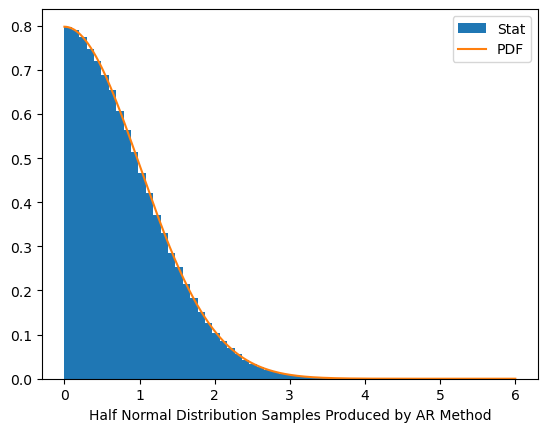

In [24]:
N = 1000000
k, X = sample_half_normal_v2(N)
1000000/k
x = np.linspace(0,6,10000)
plt.hist(X[0:k], bins=50, density=True, label=r"Stat");
plt.plot(x,np.sqrt(2/np.pi)*np.exp(-x**2/2), label=r"PDF")
plt.legend()
plt.xlabel(r"Half Normal Distribution Samples Produced by AR Method")
plt.show()

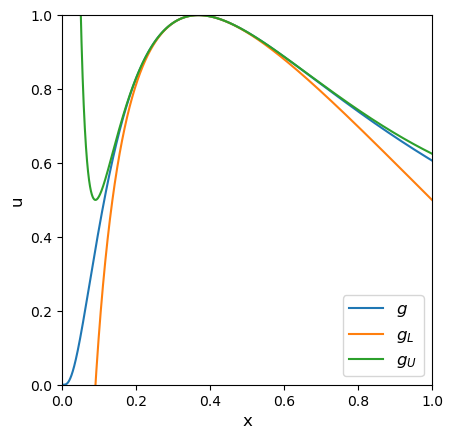

In [25]:
x = np.linspace(0,1,10000)
z = -np.log(x)
g = np.exp(-(z - 1)**2 / 2)
gl = 1 - (z - 1)**2 / 2
gu = 1 - (z - 1)**2 / 2 + (z - 1)**4 / 8
plt.plot(x,u,label=r'$g$')
plt.plot(x,gl,label=r'$g_L$')
plt.plot(x,gu,label=r'$g_U$')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
axs = plt.gca()
axs.set_aspect('equal', 'box')
plt.legend(fontsize="12")
plt.xlabel(r"x",fontsize="12")
plt.ylabel(r"u",fontsize="12")
#plt.savefig('squeeze.pdf')
plt.show()